In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train_final.csv")
test_data = pd.read_csv("test_final.csv")

In [3]:
train_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income>50K
0,53,Self-emp-not-inc,93449,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,1
1,33,Self-emp-not-inc,123424,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
2,47,Private,144844,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,0
3,40,Private,114580,HS-grad,9,Divorced,Craft-repair,Other-relative,White,Female,0,0,40,Vietnam,0
4,39,Private,115618,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,50,United-States,0


In [4]:
test_data=test_data.drop('ID',axis=1,inplace=False)

In [5]:
train_data['fnlwgt'] = train_data['fnlwgt'].apply(lambda x: np.log1p(x))
test_data['fnlwgt'] = test_data['fnlwgt'].apply(lambda x: np.log1p(x))

In [6]:
#Education and Education_num,delete one and keep one
train_data = train_data.drop('education',axis=1,inplace=False)

In [7]:
test_data=test_data.drop('education',axis=1,inplace=False)

In [8]:
train_data.replace('?', np.nan, inplace=True)

In [9]:
test_data.replace('?', np.nan, inplace=True)

In [10]:
train_data.isnull().any()

age               False
workclass          True
fnlwgt            False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income>50K        False
dtype: bool

In [11]:
#Workclass Occupation Country: ?
test_data["workclass"] = test_data["workclass"].fillna("Private")
test_data["occupation"] =test_data["occupation"].fillna("Prof-specialty")
test_data["native.country"] =test_data["native.country"].fillna("United-States")

In [12]:
#Workclass Occupation Country :?
train_data["workclass"] = train_data["workclass"].fillna("Private")
train_data["occupation"] =train_data["occupation"].fillna("Prof-specialty")
train_data["native.country"] =train_data["native.country"].fillna("United-States")

In [13]:
def native(country):
    if country in ['United-States', 'Cuba']:
        return 'US'
    elif country in ['England', 'Germany', 'Canada', 'Italy', 'France', 'Greece', 'Philippines']:
        return 'Western'
    elif country in ['Mexico', 'Puerto-Rico', 'Honduras', 'Jamaica', 'Columbia', 'Laos', 'Portugal', 'Haiti',
                     'Dominican-Republic', 'El-Salvador', 'Guatemala', 'Peru', 
                     'Trinadad&Tobago', 'Outlying-US(Guam-USVI-etc)', 'Nicaragua', 'Vietnam', 'Holand-Netherlands' ]:
        return 'Poor' # no offence
    elif country in ['India', 'Iran', 'Cambodia', 'Taiwan', 'Japan', 'Yugoslavia', 'China', 'Hong']:
        return 'Eastern'
    elif country in ['South', 'Poland', 'Ireland', 'Hungary', 'Scotland', 'Thailand', 'Ecuador']:
        return 'Poland team'
    
    else: 
        return country    

In [14]:
train_data['native.country'] = train_data['native.country'].apply(native)
test_data['native.country'] = test_data['native.country'].apply(native)

In [15]:
temp = train_data[train_data["income>50K"] == 1]

country_vs_age = train_data[["native.country","income>50K","age"]].groupby(["native.country","income>50K"]).mean()

In [16]:
country_vs_age = country_vs_age.reset_index()

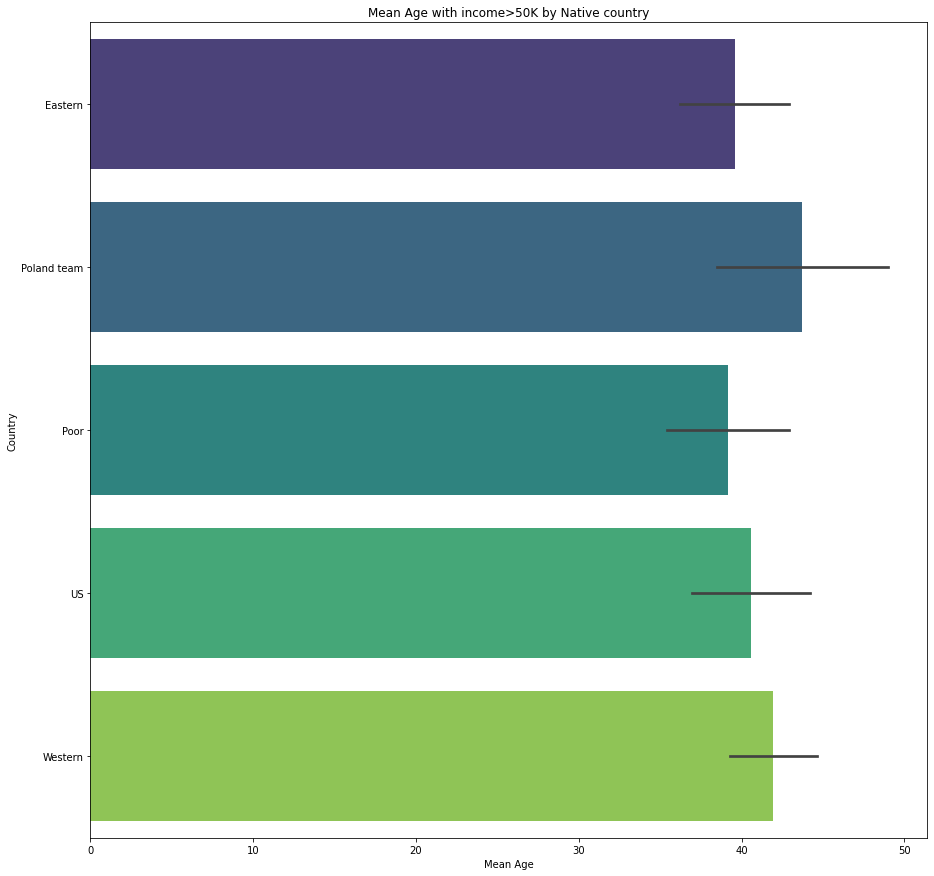

In [17]:
plt.figure(figsize = (15,15))
sns.barplot(x = "age", y = "native.country", data = country_vs_age, palette = "viridis")
plt.xlabel("Mean Age")
plt.ylabel("Country")
plt.title("Mean Age with income>50K by Native country")
plt.show()

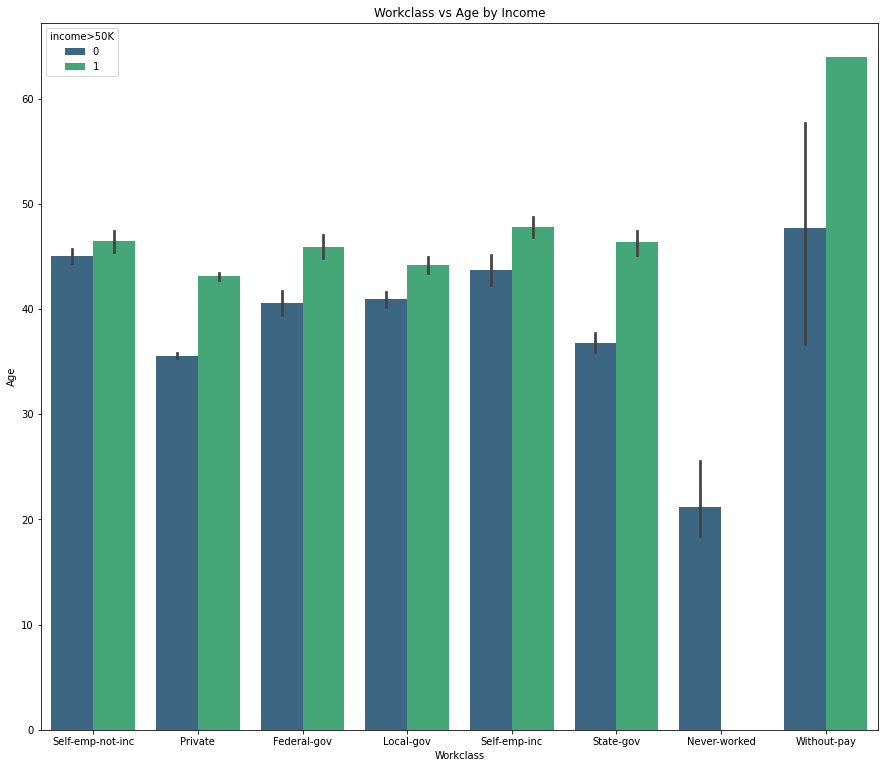

In [18]:
plt.figure(figsize= (15,13))
sns.barplot(x="workclass",y="age", hue="income>50K", data=train_data, palette = "viridis",color="red")
plt.xlabel("Workclass")
plt.ylabel("Age")
plt.title("Workclass vs Age by Income")
plt.show()

In [19]:
test_data['native.country']

0        US
1        US
2        US
3        US
4        US
         ..
23837    US
23838    US
23839    US
23840    US
23841    US
Name: native.country, Length: 23842, dtype: object

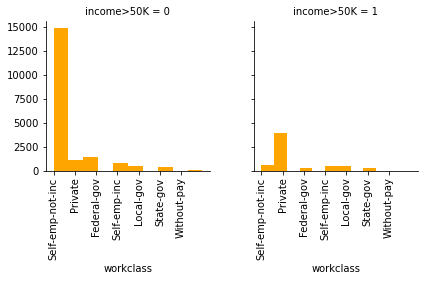

In [20]:
g = sns.FacetGrid(train_data, col='income>50K')
g.map(plt.hist, "workclass",color="orange")
g.set_xticklabels(rotation=90)

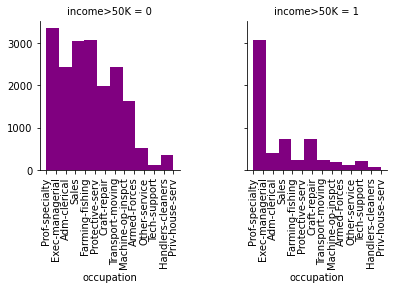

In [21]:
g = sns.FacetGrid(train_data, col='income>50K')
g.map(plt.hist, "occupation",color="purple")
g.set_xticklabels(rotation=90)

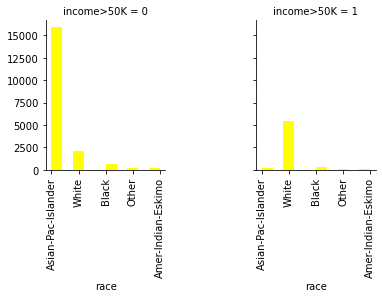

In [22]:
g = sns.FacetGrid(train_data, col='income>50K')
g.map(plt.hist, "race",color="yellow")
g.set_xticklabels(rotation=90)

In [23]:
train_data['Target']=train_data['income>50K']
train_data['marital_status']=train_data['marital.status']

<Figure size 432x288 with 0 Axes>

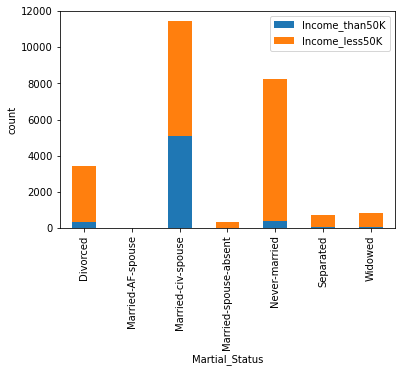

In [24]:
#查看Martial_Status婚姻状况与Target的关系 
import matplotlib.pyplot as plt
fig = plt.figure()
fig.set(alpha=0.2)

income_than50K = train_data.marital_status[train_data.Target ==1].value_counts()
income_less50K = train_data.marital_status[train_data.Target ==0].value_counts()
df = pd.DataFrame({u'Income_than50K':income_than50K,u'Income_less50K':income_less50K})
df.plot(kind='bar',stacked=True)
plt.xlabel(u'Martial_Status')
plt.ylabel(u'count')
plt.show()

In [25]:
train_data['education_num']=train_data['education.num']

<Figure size 432x288 with 0 Axes>

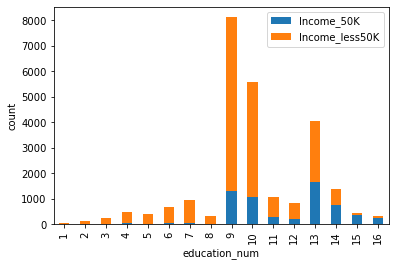

In [26]:
fig = plt.figure()
fig.set(alpha=0.2)

income_than50K = train_data.education_num[train_data.Target ==1].value_counts()
income_less50K = train_data.education_num[train_data.Target ==0].value_counts()
df = pd.DataFrame({u'Income_50K':income_than50K,u'Income_less50K':income_less50K})
df.plot(kind='bar',stacked=True)
plt.xlabel(u'education_num')
plt.ylabel(u'count')
plt.show()

<Figure size 432x288 with 0 Axes>

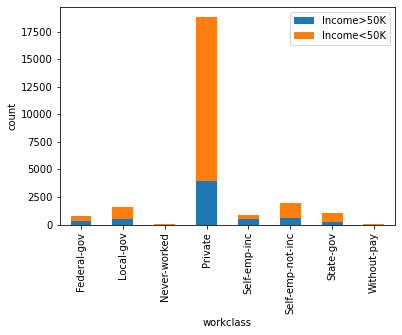

In [27]:
fig = plt.figure()
fig.set(alpha=0.2)

income_than50K = train_data.workclass[train_data.Target ==1].value_counts()
income_less50K = train_data.workclass[train_data.Target ==0].value_counts()
df = pd.DataFrame({u'Income>50K':income_than50K,u'Income<50K':income_less50K})
df.plot(kind='bar',stacked=True)
plt.xlabel(u'workclass')
plt.ylabel(u'count')
plt.show()

<Figure size 432x288 with 0 Axes>

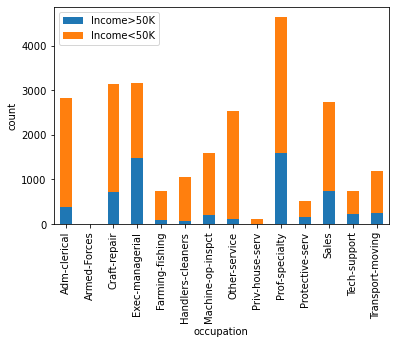

In [28]:
fig = plt.figure()
fig.set(alpha=0.2)

income_than50K = train_data.occupation[train_data.Target ==1].value_counts()
income_less50K = train_data.occupation[train_data.Target ==0].value_counts()
df = pd.DataFrame({u'Income>50K':income_than50K,u'Income<50K':income_less50K})
df.plot(kind='bar',stacked=True)
plt.xlabel(u'occupation')
plt.ylabel(u'count')
plt.show()

<Figure size 432x288 with 0 Axes>

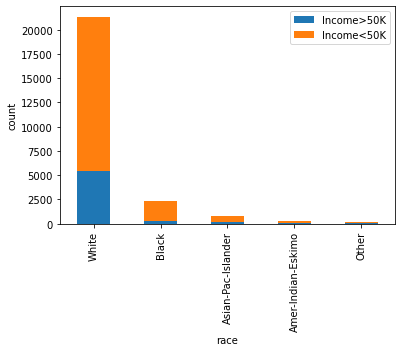

In [29]:
fig = plt.figure()
fig.set(alpha=0.2)

income_than50K = train_data.race[train_data.Target ==1].value_counts()
income_less50K = train_data.race [train_data.Target ==0].value_counts()
df = pd.DataFrame({u'Income>50K':income_than50K,u'Income<50K':income_less50K})
df.plot(kind='bar',stacked=True)
plt.xlabel(u'race')
plt.ylabel(u'count')
plt.show()

<Figure size 432x288 with 0 Axes>

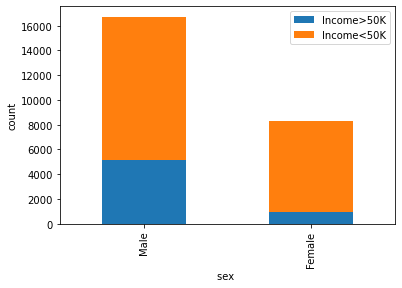

In [30]:
fig = plt.figure()
fig.set(alpha=0.2)

income_than50K = train_data.sex [train_data.Target ==1].value_counts()
income_less50K = train_data.sex  [train_data.Target ==0].value_counts()
df = pd.DataFrame({u'Income>50K':income_than50K,u'Income<50K':income_less50K})
df.plot(kind='bar',stacked=True)
plt.xlabel(u'sex ')
plt.ylabel(u'count')
plt.show()

<Figure size 432x288 with 0 Axes>

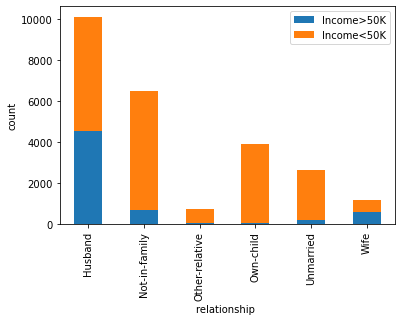

In [31]:
fig = plt.figure()
fig.set(alpha=0.2)

income_than50K = train_data.relationship [train_data.Target ==1].value_counts()
income_less50K = train_data.relationship [train_data.Target ==0].value_counts()
df = pd.DataFrame({u'Income>50K':income_than50K,u'Income<50K':income_less50K})
df.plot(kind='bar',stacked=True)
plt.xlabel(u'relationship ')
plt.ylabel(u'count')
plt.show()